# <span style="color:red"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 11 </span>

In questa esercitazione sfrutteremo la *API* ``Keras`` tramite ``Tensorflow`` per costruire una rete neurale al fine di operare dei fit su una serie di funzioni, al variare dei parametri della rete neurale.

### Esercizio 11.1 
Vogliamo costruire una rete neurale per fittare la seguente funzione:

$$ f(x) = 2x + 1 , \qquad x\in[-1,1] $$

Costruiamo un data set di *training* e uno di *test* attraverso numeri casuali generati da una distribuzione uniforme, che forniamo in input alla rete. In seguito, usiamo la rete "addestrata" per predirre il profilo della funzione, trovando così il fit cercato.

Andiamo a costruire vari ***modelli*** di rete neurale, in cui modifichiamo alcuni parametri che definiscono il network: $N_{train}, N_{test}, N_{epoch}$, valori che specificano il numero dei punti di training e test, e delle epoche.

Inoltre, aggiungiamo alla funzione un rumore gaussiano $\eta_i$ : $y_i = f(x_i) + \eta_i$, per vedere l'effetto sulla predizione del modello.

Non andiamo a modificare in questo caso la funzione di attivazione (*sigmoide*) e l'ottimizzatore della rete (*SGD*), che sono lasciati invariati per tutti i modelli. Anche la funzione loss (*MSE*) non viene cambiata. La rete è costituita da un solo layer nascosto di un neurone.

Di seguito riportiamo i risultati ottenuti con i modelli; nelle varie celle corrispondenti ai modelli sono indicati tutti i parametri necessari e modificati.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

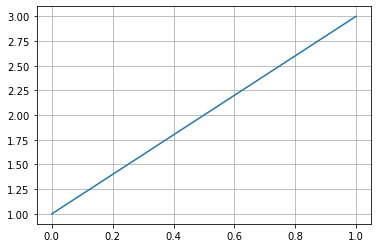

In [174]:
# Defining y = f(x) + noise

m = 2.0
b = 1.0
np.random.seed(0)
sigma = 0.0

def f(x , mu, sigma):
    y = m*x + 1
    noise = np.random.normal(mu,sigma)
    return y + noise

#Plotting f(x)
x = np.linspace(0,1, 100)
y = f(x, mu, sigma)
plt.plot(x,y)
plt.grid(True)
plt.show()

In [173]:
# Defining NN

#DATA SET
def data(n_train, n_test, lim_inf, lim_sup):
    
    #Prepare training set
    x_train = np.random.uniform(lim_inf, lim_sup, n_train)
    y_train = f(x_train, 0.0, sigma)
    
    #Prepare testing set
    x_test = np.random.uniform(lim_inf, lim_sup, n_test)
    x_test.sort()
    y_test = f(x_test, mu, sigma)
    
    return x_train, y_train, x_test, y_test


#Assembling network
def network(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(1,), activation=activation[0])) #Input layer
    
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #Hidden layers
        
    model.add(Dense(1,)) #Output layer
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    return model


#Training network
def train(model, x_train, x_test, y_train, y_test, batch, epochs):
    history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_test, y_test))
    return history

# Plotting results
def plot(model, history, lim_inf, lim_sup):
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    
    #Training
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Test'], loc='best')
    axs[0].grid(True)
    
    #Model prediction
    x_predicted = np.random.uniform(lim_inf, lim_sup, 100)
    y_predicted = model.predict(x_predicted)
    axs[1].scatter(x_predicted, y_predicted,color='r', label="Predicted")
    axs[1].plot(x, y, label="Target")
    axs[1].legend(loc="best")
    axs[1].grid(True)
    
    plt.show()


In [175]:
# Model 1
n_train = 100
n_test = 10
n_epochs = 30

sigma = 0.0

lim_inf = -1
lim_sup = 1

layers = [1]
activation = ["sigmoid"]

x = np.linspace(lim_inf, lim_sup, 100)
y = f(x, mu, sigma)


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf, lim_sup)

model_1 = network(layers, activation)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [176]:
history = train(model_1, x_train, x_test, y_train, y_test, batch=32, epochs=n_epochs)

Epoch 1/30
4/4 [==============================] - 0s 31ms/step - loss: 1.2013 - mse: 1.2013 - val_loss: 1.2254 - val_mse: 1.2254
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 1.1665 - mse: 1.1665 - val_loss: 1.1429 - val_mse: 1.1429
Epoch 3/30
4/4 [==============================] - 0s 15ms/step - loss: 1.1283 - mse: 1.1283 - val_loss: 1.1004 - val_mse: 1.1004
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 1.1078 - mse: 1.1078 - val_loss: 1.0485 - val_mse: 1.0485
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 1.0862 - mse: 1.0862 - val_loss: 1.0052 - val_mse: 1.0052
Epoch 6/30
4/4 [==============================] - 0s 14ms/step - loss: 1.0650 - mse: 1.0650 - val_loss: 0.9544 - val_mse: 0.9544
Epoch 7/30
4/4 [==============================] - 0s 16ms/step - loss: 1.0452 - mse: 1.0452 - val_loss: 0.9337 - val_mse: 0.9337
Epoch 8/30
4/4 [==============================] - 0s 14ms/step - loss: 1.0350 - mse: 1.0350 - val

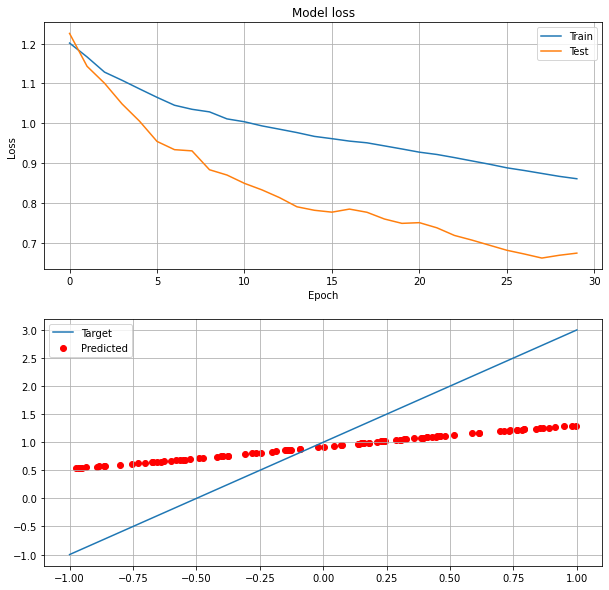

In [177]:
plot(model_1, history, lim_inf, lim_sup)

In [178]:
# Model 2
n_train = 500
n_test = 50
n_epochs = 30

sigma = 0.0

lim_inf = -1
lim_sup = 1

layers = [1]
activation = ["sigmoid"]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf, lim_sup)

model_2 = network(layers, activation)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [179]:
history = train(model_2, x_train, x_test, y_train, y_test, batch=32, epochs=n_epochs)

Epoch 1/30
16/16 [==============================] - 0s 11ms/step - loss: 4.2633 - mse: 4.2633 - val_loss: 3.7966 - val_mse: 3.7966
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 2.8251 - mse: 2.8251 - val_loss: 2.7599 - val_mse: 2.7599
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 2.2006 - mse: 2.2006 - val_loss: 2.2725 - val_mse: 2.2725
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 1.9124 - mse: 1.9124 - val_loss: 2.0233 - val_mse: 2.0233
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 1.7672 - mse: 1.7672 - val_loss: 1.8780 - val_mse: 1.8780
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 1.6833 - mse: 1.6833 - val_loss: 1.7855 - val_mse: 1.7855
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 1.6296 - mse: 1.6296 - val_loss: 1.7250 - val_mse: 1.7250
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 1.5918 - mse: 1.5

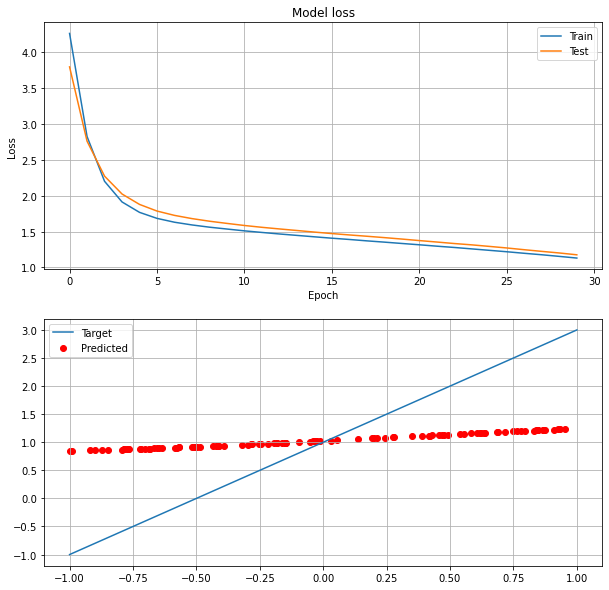

In [180]:
plot(model_2, history, lim_inf, lim_sup)

In [181]:
# Model 3
n_train = 500
n_test = 50
n_epochs = 30

sigma = 0.5

lim_inf = -1
lim_sup = 1

layers = [1]
activation = ["sigmoid"]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf, lim_sup)

model_3 = network(layers, activation)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [182]:
history = train(model_3, x_train, x_test, y_train, y_test, batch=32, epochs=n_epochs)

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 3.2322 - mse: 3.2322 - val_loss: 2.8654 - val_mse: 2.8654
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 2.2076 - mse: 2.2076 - val_loss: 2.1471 - val_mse: 2.1471
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 1.7522 - mse: 1.7522 - val_loss: 1.8028 - val_mse: 1.8028
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 1.5384 - mse: 1.5384 - val_loss: 1.6342 - val_mse: 1.6342
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 1.4407 - mse: 1.4407 - val_loss: 1.5445 - val_mse: 1.5445
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 1.3874 - mse: 1.3874 - val_loss: 1.4856 - val_mse: 1.4856
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 1.3540 - mse: 1.3540 - val_loss: 1.4537 - val_mse: 1.4537
Epoch 8/30
16/16 [==============================] - 0s 7ms/step - loss: 1.3339 - mse: 1.3

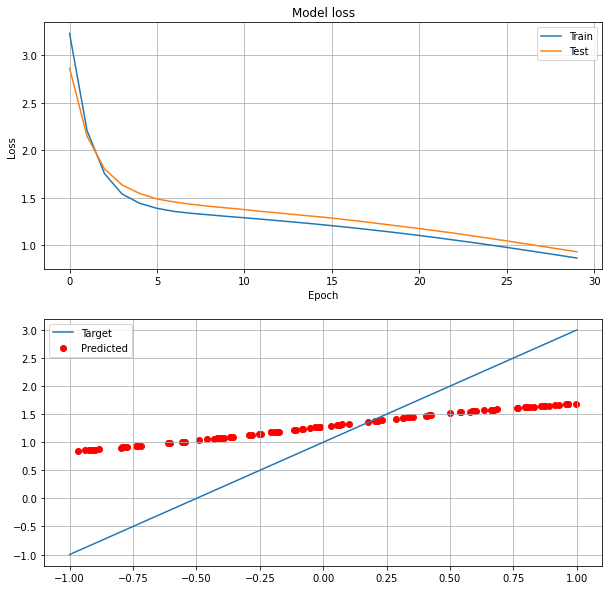

In [183]:
plot(model_3, history, lim_inf, lim_sup)

In [185]:
# Model 4
n_train = 10000
n_test = 1000
n_epochs = 40

sigma = 0.5

lim_inf = -1
lim_sup = 1

layers = [1]
activation = ["sigmoid"]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf, lim_sup)

model_4 = network(layers, activation)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [186]:
history = train(model_4, x_train, x_test, y_train, y_test, batch=32, epochs=n_epochs)

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 1.4940 - mse: 1.4940 - val_loss: 1.3216 - val_mse: 1.3216
Epoch 2/40
313/313 [==============================] - 1s 3ms/step - loss: 0.8781 - mse: 0.8781 - val_loss: 0.7428 - val_mse: 0.7428
Epoch 3/40
313/313 [==============================] - 1s 3ms/step - loss: 0.3573 - mse: 0.3573 - val_loss: 0.3601 - val_mse: 0.3601
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 0.1165 - mse: 0.1165 - val_loss: 0.2046 - val_mse: 0.2046
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.1597 - val_mse: 0.1597
Epoch 6/40
313/313 [==============================] - 1s 4ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 0.1480 - val_mse: 0.1480
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.1408 - val_mse: 0.1408
Epoch 8/40
313/313 [==============================] - 1s 5ms/step - loss: 0.

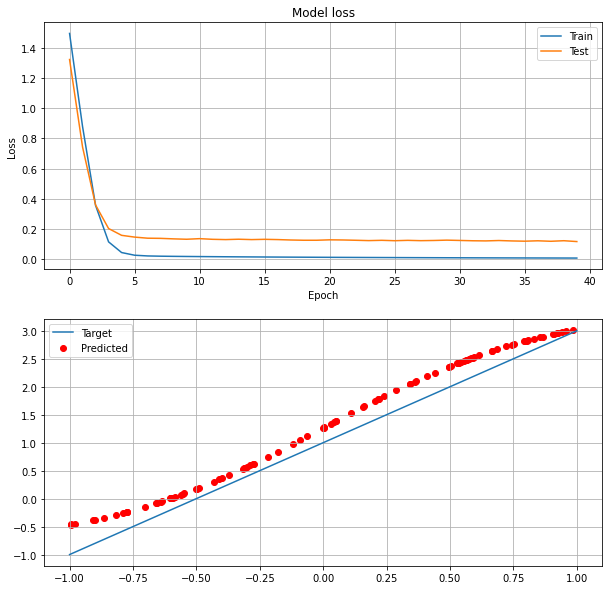

In [187]:
plot(model_4, history, lim_inf, lim_sup)

Dal ***Modello 1*** e ***Modello 2*** si può vedere come un basso numero di dati genera un risultato del test lontano da quello di training; aumentando il numero di punti l'andamento del test si avvicina, ma la predizione del modello è molto lontana dalla funzione target.

L'aggiunta del rumore gaussiano non va a influire significativamente sul test, e rimane sempre poco influente quando aumentiamo il numero di punti e di epoche (***Modello 4***); vediamo quindi che per questa semplice rete neurale di un layer con un solo neurone, è necessario avere un elevato numero di punti di training per raggiungere un fit del modello soddisfacente.

### Esercizio 11.2
Estendiamo il modello di fitting ad una funzione polinomiale:

$$ f(x)=4-3x-2x^2+3x^3 , \qquad x\in[-1,1]$$

A seguito dei risultati ottenuti nella sezione precedente, utlizziamo un numero sufficentemente grande di punti: $N_{test}=10^5$, $N_{test}=1000$, $N_{epoch}=100$. 

Quello che andiamo a modificare per vedere come variano le predizioni del modello è la struttura dela rete neurale: numero di layers, numero di neutroni per layer, funzione di ottimizzazione e di attivazione, funzione loss.

Siamo inoltre interesati a vedere come i nostri modelli si comprtano fuori dal range di training; quindi quando operiamo il fitting, lo facciamo nel range più ampio $[-\frac{3}{2}, \frac{3}{2}]$.

Di seguito riportiamo i risultati, dove nuovamente indicati i vari parametri nelle celle; la notazione per indicare layers, neuroni e funzioni di attivazione è la seguente:

$$ [\underbrace{N_{neurone}^1}_{Layer \, 1}\,, \underbrace{N_{neurone}^2}_{Layer \, 2}\,, \; \dots \; \underbrace{N_{neurone}^n}_{Layer \, n}]
$$

$$ [\underbrace{A^1}_{Attivazione \, 1}\,, \underbrace{A^2}_{Attivazione \, 2}\,, \; \dots \; \underbrace{A^n}_{Attivazione \, n}]
$$

Le modifiche agli ottimizzatori e alle funzioni loss sono indicate smepre nelle celle.

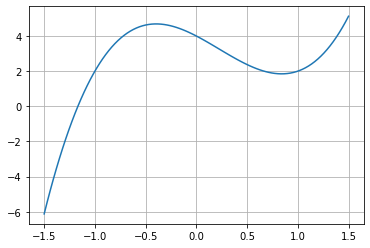

In [360]:
def f(x):
    return 4-3*x-2*(x**2)+3*(x**3)

lim_inf = -1.5
lim_sup = 1.5

lim_inf_tr = -1
lim_sup_tr = 1

#Plotting f(x)
x = np.linspace(lim_inf, lim_sup, 100)
y = f(x)
plt.plot(x,y)
plt.grid(True)
plt.show()

In [361]:
# Defining NN

#DATA SET
def data(n_train, n_test, lim_inf, lim_sup):
    
    #Prepare training set
    x_train = np.random.uniform(lim_inf, lim_sup, n_train)
    y_train = f(x_train)
    
    #Prepare testing set
    x_test = np.random.uniform(lim_inf, lim_sup, n_test)
    x_test.sort()
    y_test = f(x_test)
    
    return x_train, y_train, x_test, y_test


#Assembling network
def network(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(1,), activation=activation[0])) #Input layer
    
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #Hidden layers
        
    model.add(Dense(1,)) #Output layer
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    return model


#Training network
def train(model, x_train, x_test, y_train, y_test, batch, epochs):
    history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_test, y_test), verbose=0)
    return history

# Plotting results
def plot(model, history, lim_inf, lim_sup):
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    
    #Training
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Test'], loc='best')
    axs[0].grid(True)
    
    #Model prediction
    x_predicted = np.random.uniform(lim_inf, lim_sup, 1000)
    y_predicted = model.predict(x_predicted)
    axs[1].scatter(x_predicted, y_predicted,color='r', label="Predicted")
    axs[1].plot(x, y, label="Target")
    axs[1].legend(loc="best")
    axs[1].grid(True)
    
    plt.show()


In [245]:
# Model 1
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1 #Training limits
lim_sup_tr = 1

layers = [4]
activation = ["sigmoid"]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_1 = network(layers, activation)

history = train(model_1, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 4)                 8         
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


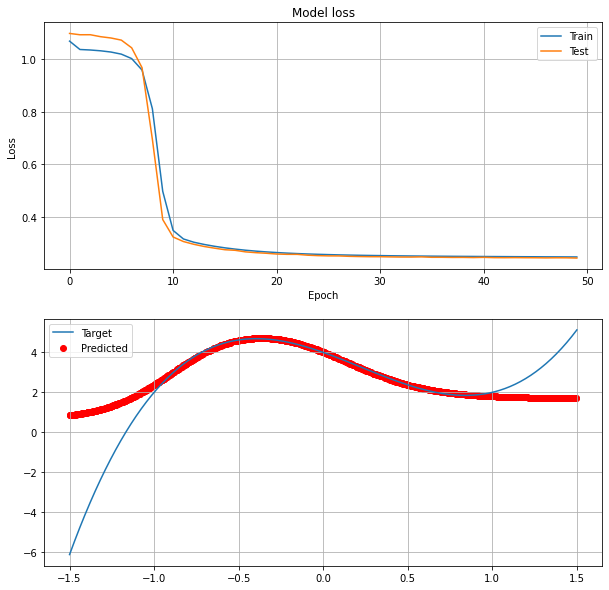

In [248]:
plot(model_1, history, lim_inf, lim_sup)

In [362]:
# Model 2
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1
lim_sup_tr = 1

layers = [4, 4, 4]
activation = ["sigmoid", "sigmoid", "sigmoid"]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_2 = network(layers, activation)

history = train(model_2, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 4)                 8         
_________________________________________________________________
dense_237 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_238 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 5         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


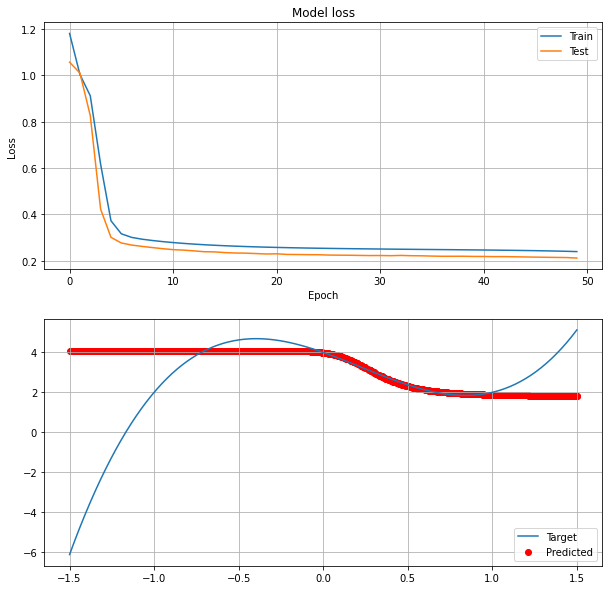

In [364]:
plot(model_2, history, lim_inf, lim_sup)

In [251]:
# Model 3
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1
lim_sup_tr = 1

layers = [30, 30, 30, 30]
activation = ["sigmoid", "sigmoid", "sigmoid", "sigmoid" ]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_3 = network(layers, activation)

history = train(model_3, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_165 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_166 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_167 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 31        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


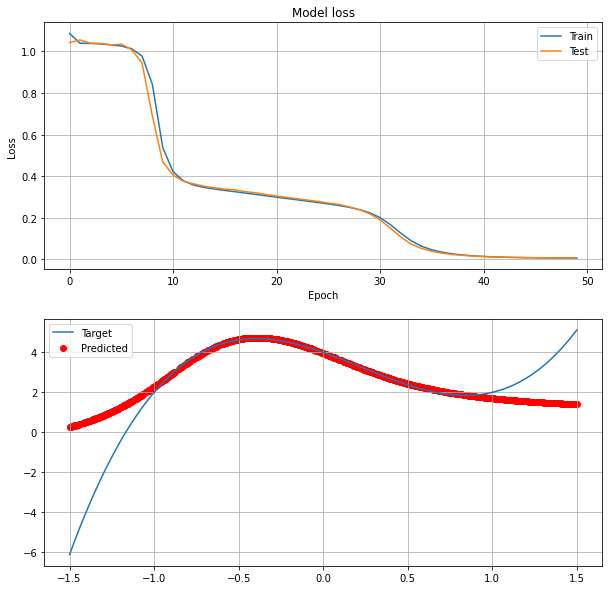

In [253]:
plot(model_3, history, lim_inf, lim_sup)

In [255]:
#Assembling network with different loss function

def network(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(1,), activation=activation[0])) #Input layer
    
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #Hidden layers
        
    model.add(Dense(1,)) #Output layer
    
    model.compile(optimizer='adadelta', loss='mae', metrics=['mae']) #Adadelta e Mean Abs Error
    model.summary()
    return model

# Model 4
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1
lim_sup_tr = 1

layers = [30, 30, 30, 30]
activation = ["sigmoid", "sigmoid", "sigmoid", "sigmoid" ]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_4 = network(layers, activation)

history = train(model_4, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_175 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_176 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_177 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_178 (Dense)            (None, 1)                 31        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


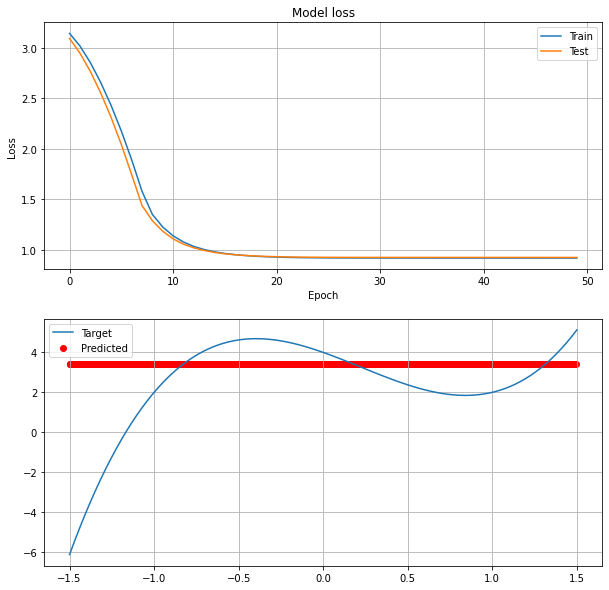

In [256]:
plot(model_4, history, lim_inf, lim_sup)

In [257]:
#Assembling network with different loss function
def network(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(1,), activation=activation[0])) #Input layer
    
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #Hidden layers
        
    model.add(Dense(1,)) #Output layer
    
    model.compile(optimizer='sgd', loss='mae', metrics=['mae']) #SGD e Mean Abs Error
    model.summary()
    return model

# Model 5
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1
lim_sup_tr = 1

layers = [30, 30, 30, 30]
activation = ["sigmoid", "sigmoid", "sigmoid", "sigmoid" ]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_5 = network(layers, activation)

history = train(model_5, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_179 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_180 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_181 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_182 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 31        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


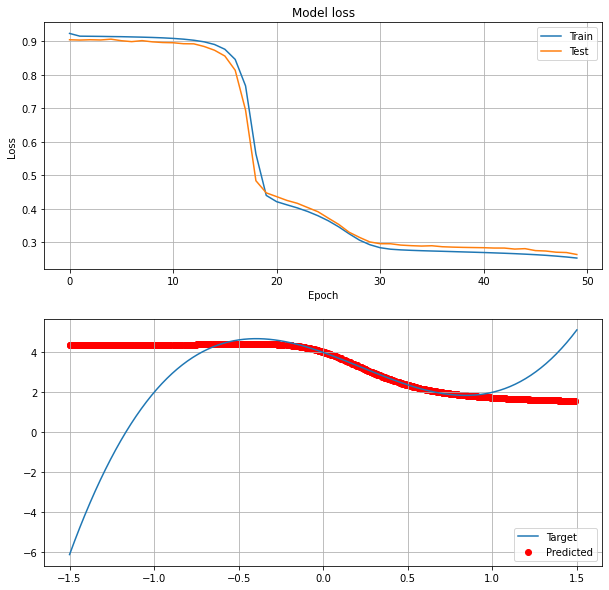

In [258]:
plot(model_5, history, lim_inf, lim_sup)

In [259]:
#Default network
def network(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(1,), activation=activation[0])) #Input layer
    
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #Hidden layers
        
    model.add(Dense(1,)) #Output layer
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    return model

# Model 6
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1
lim_sup_tr = 1

layers = [30, 30, 30, 30]
activation = ["relu", "relu", "relu", "relu" ]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_6 = network(layers, activation)

history = train(model_6, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_185 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_186 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_187 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_188 (Dense)            (None, 1)                 31        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


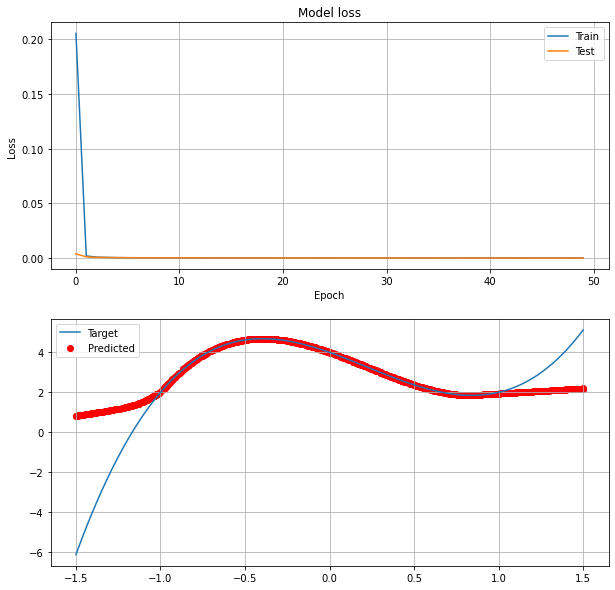

In [260]:
plot(model_6, history, lim_inf, lim_sup)

In [261]:
# Model 7
n_train = int(1e5)
n_test = 1000
n_epochs = 50

lim_inf_tr = -1
lim_sup_tr = 1

layers = [30, 30, 30, 30]
activation = ["linear", "linear", "linear", "linear" ]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_7 = network(layers, activation)

history = train(model_7, x_train, x_test, y_train, y_test, batch=100, epochs=n_epochs)

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_190 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_191 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_192 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 31        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


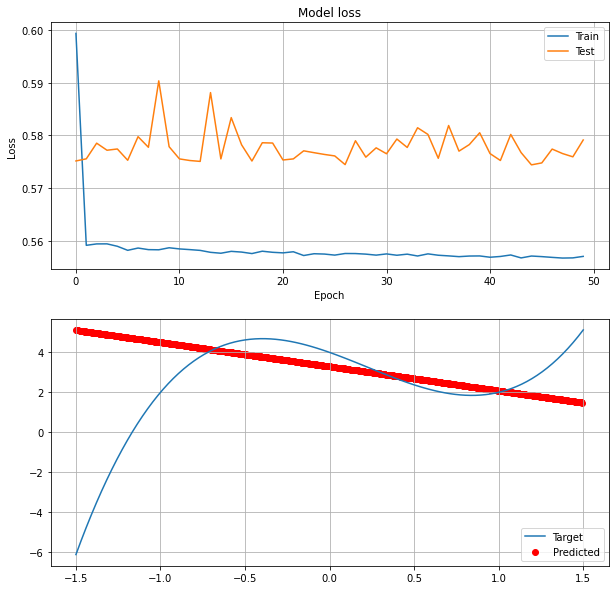

In [262]:
plot(model_7, history, lim_inf, lim_sup)

Notiamo che in tutti i casi di fit soddisfacente nel range di training, non si riesce a predirre con efficacia la funzioni al di fuori, neanche modificando i parametri della rete neurale.

Il ***Modello 1*** rappresenta un buon fit della funzione; nel ***Modello 2*** proviamo ad aumentare il numero di layers, ma il fit non risulta buono per $x$ negative. Il problema si risolve con il ***Modello 3***, andando ad aumentare il numero di neuroni per layer.

Nel ***Modello 4*** modifichiamo ottimizzatore (*Adadelta* ) e funzione loss (*MAE*); questo modello non predice assolutamete la funzione, e il sospetto è che sia la funzione loss non adatto al problema; nel ***Modello 5*** torniamo all'ottimizzatore *SGD* rimanendo con *MAE*, ed in effetti il fit risulta poco soddisfacente per $x$ negativi.

Nel ***Modello 6*** usiamo una *RELU* come funzione di attivazione (nei casi precedenti era una *sigmoide*) il fit risultante è il migliore di quelli ottenuti finora.

Infine nel ***Modello 7*** proviamo ad usare una funzione di attivazione *lineare*, ovvero che non modifica il segnale di input; il fit che ne risulta non predice l'andamento della funzione; in particolare l'andmanto del test differisce molto da quello di training.

### Esercizio 11.3
Applichiamo tutto quando discusso nelle sezioni precedenti al caso di una funzione trigonometrica $2D$:

$$ f(x,y) = \sin(x^2+y^2)\,, \quad  x\in [-3/2,3/2] $$

Nuovamente, estendiamo il range di predizione a $[-2,2]$ per verificare la bontà del fit fuori dal range di training. Ulizziamo $N_{training}=10^5$ , $N_{test}=1000$, $N_{epoch}=50$.

Utilizziamo una rete neurale composta da $6$ layers nascosti, ciascuno con $30$ neuroni. La funzione di attivazione per tutti i layers è la *RELU*; come ottimizzatore usiamo il *SGD* e come funzione loss la *MSE*.

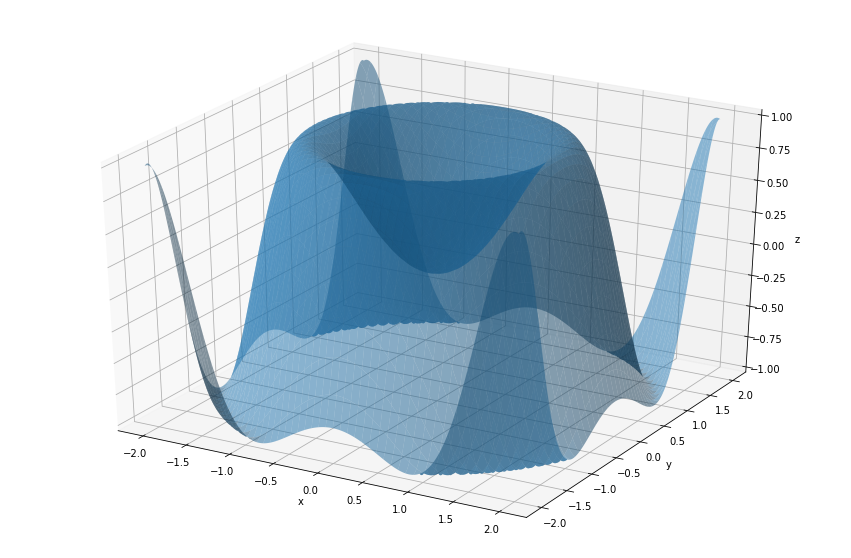

In [319]:
#Defining function
def f(x,y):
    return np.sin(x*x + y*y)

from mpl_toolkits.mplot3d import Axes3D

lim_inf = -2
lim_sup = 2

lim_inf_tr = -1.5
lim_sup_tr = 1.5

x = np.linspace(lim_inf, lim_sup, num=1000)
y = np.linspace(lim_inf, lim_sup, num=1000)
x,y = np.meshgrid(x, y)
z = f(x,y)


fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


plt.show()

In [353]:
# Defining NN

#DATA SET
def data(n_train, n_test, lim_inf, lim_sup):
    
    #Prepare training set
    x_train = lim_inf + np.random.rand(n_train,2)*(lim_sup - lim_inf)
    y_train = f(x_train[:,0], x_train[:,1])
    
    #Prepare testing set
    x_test = lim_inf + np.random.rand(n_test,2)*(lim_sup - lim_inf)
    y_test = f(x_test[:,0],x_test[:,1])
    
    return x_train, y_train, x_test, y_test


#Assembling network
def network(layers, activation):
    model = Sequential()
    model.add(Dense(layers[0], input_shape=(2,), activation=activation[0])) #Input layer ( x y input)
    
    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation[i]))  #Hidden layers
        
    model.add(Dense(1,)) #Output layer
    
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    return model


#Training network
def train(model, x_train, x_test, y_train, y_test, batch, epochs):
    history = model.fit(x=x_train, y=y_train, 
          batch_size=batch, epochs=epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_test, y_test), verbose=1)
    return history

# Plotting results
def plot(model, history, lim_inf, lim_sup):
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    #Training
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='best')
    ax1.grid(True)
    
    #Model prediction
    fig = plt.figure(figsize=(15,10))
    x1_predicted = np.random.uniform(lim_inf, lim_sup, size=10000)
    x2_predicted = np.random.uniform(lim_inf, lim_sup, size=10000)
    x_predicted = np.transpose(np.array([x1_predicted, x2_predicted]))
    y_predicted = model.predict(x_predicted)
    
    ax2 = fig.gca(projection='3d')
    ax2.plot_surface(x, y, z, alpha=0.5, linewidth=0, antialiased=True, label="Target")
    ax2.scatter(x1_predicted, x2_predicted, y_predicted, color="red", alpha=0.7, linewidth=0, antialiased=True)
    
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_zlabel("z")
    
    plt.show()


In [323]:
# Model sine

n_train = int(1e5)
n_test = 1000
n_epochs = 50

layers = [30, 30, 30, 30, 30, 30]
activation = ["relu", "relu", "relu", "relu", "relu", "relu"]


x_train, y_train, x_test, y_test = data(n_train, n_test, lim_inf_tr, lim_sup_tr)

model_s = network(layers, activation)

history = train(model_s, x_train, x_test, y_train, y_test, batch=1000, epochs=n_epochs)

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_229 (Dense)            (None, 30)                90        
_________________________________________________________________
dense_230 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_231 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_232 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_233 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_234 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_235 (Dense)            (None, 1)               

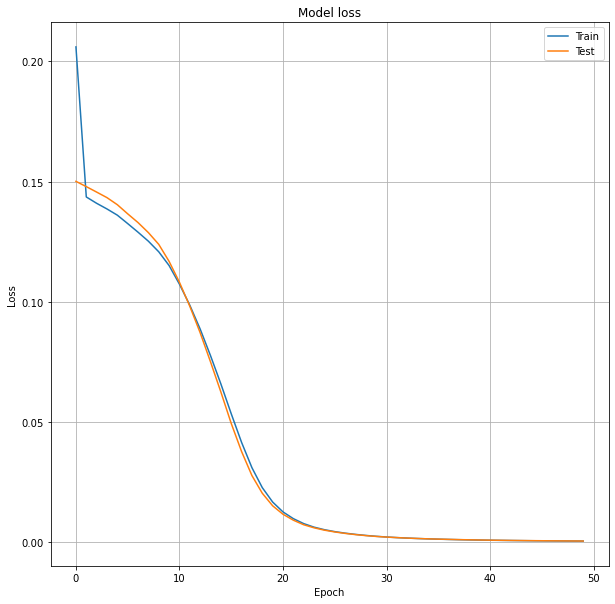

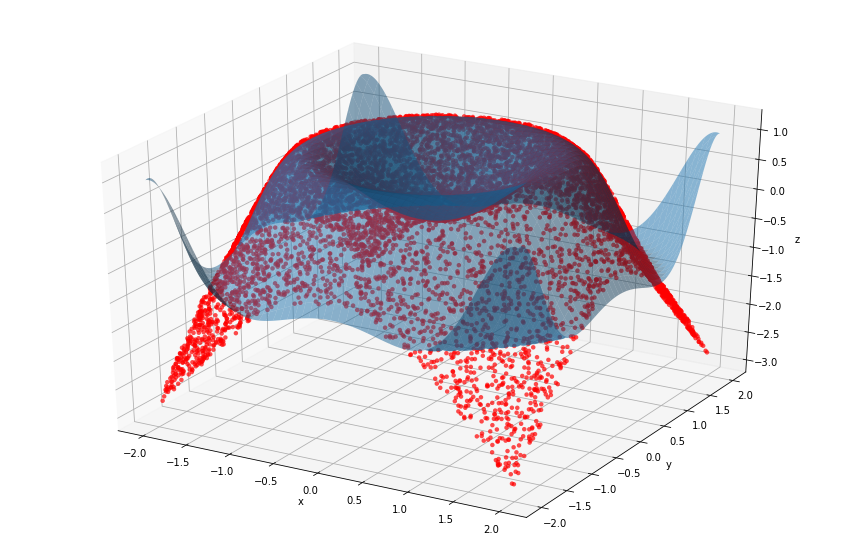

In [354]:
plot(model_s, history, lim_inf, lim_sup)

Il risultato del fit è soddisfacente; l'andamento del test rispecchia bene quello del training. Notiamo che anche in questo caso fuori dal range di training il modello non predice bene l'andamento della funzione.